<a href="https://colab.research.google.com/github/RamaSiritha/Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df = pd.read_csv("/content/sample_data/Churn_Modelling.csv",encoding = "ISO-8859-1")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [17]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

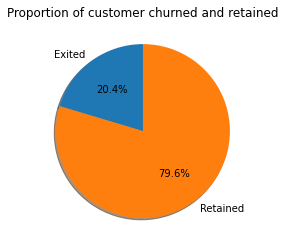

In [18]:
l = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
plt.pie(sizes, labels=l, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion of customer churned and retained")
plt.show()

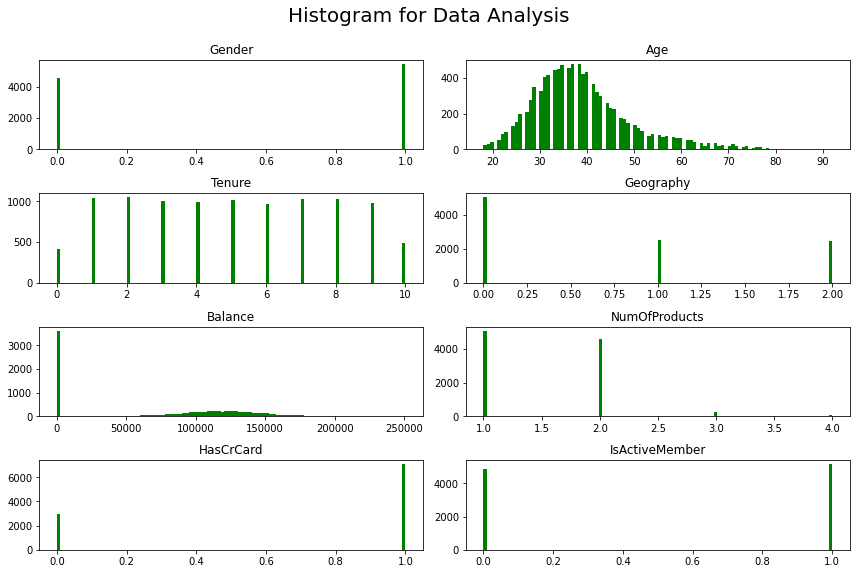

In [19]:
d= df[['Gender','Age', 'Tenure', 'Geography', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember']]

chart= plt.figure(figsize=(12,12))
plt.suptitle("Histogram for Data Analysis\n", horizontalalignment="center", fontstyle="normal", fontsize = 20)
for i in range(d.shape[1]):
  plt.subplot(6,2,i+1)
  f=plt.gca()
  f.set_title(d.columns.values[i])
  val=np.size(d.iloc[:,i])
  if(val>100):
    val=100
  
  plt.hist(d.iloc[:,i], bins=val, color='green')
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Observations:

Gender- Both male and female are almost equal, we have a bit more number
of records in the dataset that are males.

Age-Most of the customers are in between the age 30 to 40.

Tenure-The tenure mostly isfrom 1 yr to 9 yrs.

Geography- Most of the customers in the dataset are from france, then 
spain and germany.

Balance- Most of the customers are having less balance, and some have 
between 1000000 to 150000.

Num of products- Most of the customers have 1 or 2 products

Has credit card-The customers having credit card are more than the no.

Is Active member- The customers who are active and not active are almost
equal.


Text(0.5, 1.0, 'Number of people exited according to Gender Column')

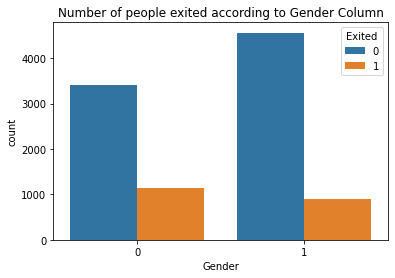

In [21]:
sns.countplot(x='Gender', hue = 'Exited', data = df).set_title('Number of people exited according to Gender Column')

Text(0.5, 1.0, 'Number of people exited according to Age Column')

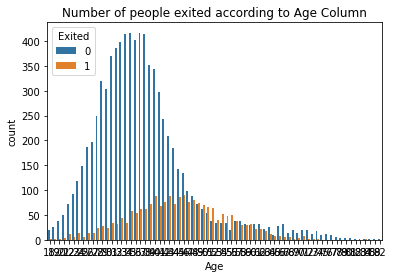

In [23]:
sns.countplot(x='Age', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Age Column')

Text(0.5, 1.0, 'Number of people exited according to Tenure Column')

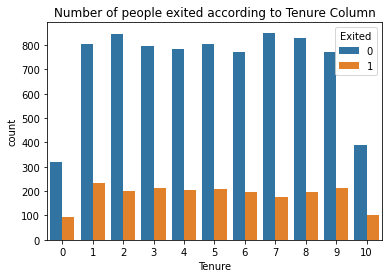

In [24]:
sns.countplot(x='Tenure', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Tenure Column')

Text(0.5, 1.0, 'Number of people exited according to Geography Column')

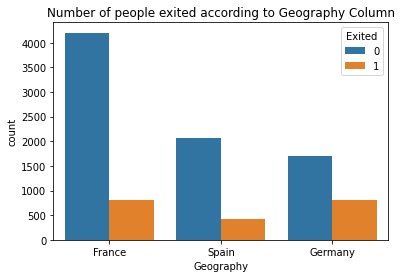

In [25]:
sns.countplot(x='Geography', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Geography Column')

Text(0.5, 1.0, 'Number of people exited according to NumofProducts Column')

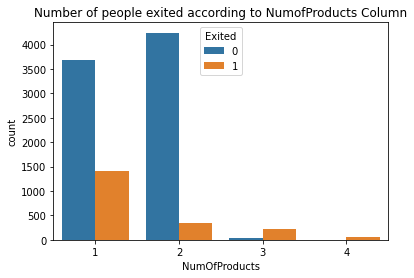

In [26]:
sns.countplot(x='NumOfProducts', hue = 'Exited', data = churn_data).set_title('Number of people exited according to NumofProducts Column')

Text(0.5, 1.0, 'Number of people exited according to HasCrCard Column')

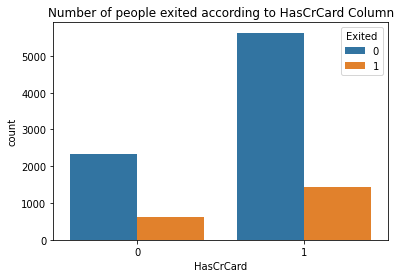

In [27]:
sns.countplot(x='HasCrCard', hue = 'Exited', data = churn_data).set_title('Number of people exited according to HasCrCard Column')

Text(0.5, 1.0, 'Number of people exited according to IsActiveMember Column')

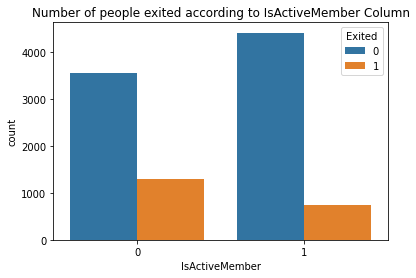

In [28]:
sns.countplot(x='IsActiveMember', hue = 'Exited', data = churn_data).set_title('Number of people exited according to IsActiveMember Column')

Observations from the analysis done on number of people exited and retained:

Number of people exited are greater in females.

Number of people exited are higher in between the age 38-45.

Number of people exited are mostly equal from 1 yr to 9 yrs.

Number of people exited are greater in France and Germany, then in Spain.

Number of people exited are greater who have only 1 product.

Number of people exited are greater in people having credit cards.

Number of people exited are greater who are not much active.

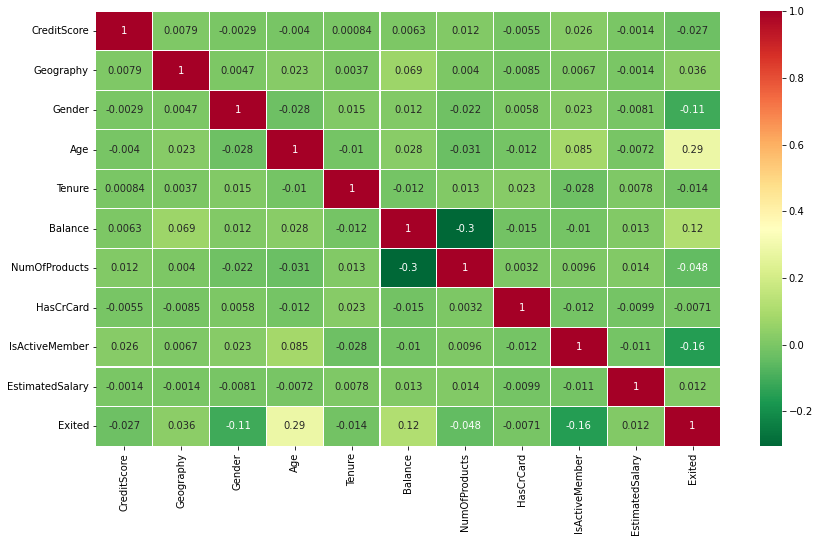

In [29]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap ="RdYlGn_r", linewidths = 0.1, annot=True) 

In [30]:
X_vars = df.drop('Exited', axis=1)
X_vars = sm.add_constant(X_vars)
y = df['Exited']
X_vars_train, X_vars_test, y_train, y_test = train_test_split(X_vars, y, test_size=0.25, random_state=11)

In [31]:
X_vars.head()

,const,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10


In [32]:
mod = sm.OLS(y, X_vars)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     157.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          4.68e-309
Time:                        21:31:45   Log-Likelihood:                -4361.3
No. Observations:               10000   AIC:                             8745.
Df Residuals:                    9989   BIC:                             8824.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1083      0.034     

### Features we got from OLS Regression

| Feature | p-value |
| --- | --- |
| CreditScore | 0.016 |
| Geography | 0.011 |
| Gender | 0.000 |
| Age | 0.000 |
| Balance | 0.000 |
| IsActiveMember | 0.000 |
| constant | 0.001 |

# Notes - 
##### 1. R-squared close to 1 and R-squared close to Adjusted R-square indicates that the features are relevant to target.
##### 2. Intercept only model: constant column with no other column
##### 3. Specified model: All the features i.e., all the columns other than constant column.
##### 4. Null-Hypothesis:(In case of F-Statistic): These 2 models are equal.
##### 5. Alternate Hypothesis: Intercept only model is worse than specified model(our model).

### F-statistic:
##### 1. If p-value is close to 0 and f-statistic value is really large then we can reject null hypothesis.
##### 2. In our case p-value is close to 0 and f-statistic value is large but not that large. We can reject null hypothesis i.e., the specified model(our model) fits the data better than the intercept only model(model with no columns/features except for constants). 

##### 3. f-statistic >1, p-value close to 0 and p- value < 0.05 indicates that the features are closely related to the target variable.

### T-statistic:
##### 1. Null-Hypothesis: the corresponding features coefficient value is going to be equal to 0.
##### 2. Alternate-Hypothesis: the corresponding features coefficient value will not be equal to 0.
##### 3. Here P>|t| means p-value of t-test
##### 4. Here t means t-value
##### 5. The higher the t-value the greater the chances that you reject the null hypothesis & you accept the alternate hypothesis.
##### 6. If p-value is lower (i.e., p<0.05) then we reject the null hypothesis.
##### 7. Rejecting null hypothesis means the coefficient value is non-zero.
##### 8. Accepting null hypothesis means the coefficient value of a feature will be 0 i.e., feature will be irrelevant.


In [33]:
mod = sm.Logit(y, X_vars)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.434991
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1395
Time:                        21:32:00   Log-Likelihood:                -4349.9
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                7.035e-297
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.5210      0.242    -14.527      0.000      -3.996      -3.046
CreditScore   

### Features we got from Logistic Regression (i.e., p < 0.05)

| Feature | p-value |
| --- | --- |
| CreditScore | 0.017 |
| Geography | 0.010 |
| Gender | 0.000 |
| Age | 0.000 |
| Balance | 0.000 |
| IsActiveMember | 0.000 |
| constant | 0.000 |

# Notes-

#### The same rules from OLS Regression applies for Logistic Regression with a slight change where the t-value is replaced with z-value.

In [34]:
mod = sm.Logit(y, X_vars)
res = mod.fit(method = 'powell')
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1986: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


Optimization terminated successfully.
         Current function value: 0.435025
         Iterations: 18
         Function evaluations: 2594
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1394
Time:                        21:32:40   Log-Likelihood:                -4350.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                9.793e-297
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.4971      0.242    -14.437      0.000 

In [35]:
X = df.drop('Exited', axis=1)
X = X[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'IsActiveMember']]
y = df['Exited']

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Balance,IsActiveMember
0,619,0,0,42,0.00,1
1,608,2,0,41,83807.86,1
2,502,0,0,42,159660.80,0
3,699,0,0,39,0.00,0
4,850,2,0,43,125510.82,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(random_state = 11)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

lr_score = round(lr.score(X_train, y_train) * 100, 2)
lr_score_test = round(lr.score(X_test, y_test) * 100, 2)
print('Score: \n', lr_score)
print('Test Score: \n', lr_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[1931   50]
 [ 486   33]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1981
           1       0.40      0.06      0.11       519

    accuracy                           0.79      2500
   macro avg       0.60      0.52      0.49      2500
weighted avg       0.72      0.79      0.72      2500

Score: 
 79.13
Test Score: 
 78.56
Accuracy: 
 0.7856


### GridSearch CV

In [39]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
]

lr_gscv = GridSearchCV(lr, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_lr_gscv = lr_gscv.fit(X_train, y_train)

print(best_lr_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_lr_gscv.score(X_test, y_test))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
{'C': 0.03359818286283781, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 11, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.8032


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [40]:
import sklearn.metrics as metrics

probs = best_lr_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_lr_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.8032 
 Balanced Accuracy :  0.713064562238167 
 Precision         :  0.14065510597302505 
 Average Precision :  0.10468422467252798 
 F1-Score          :  0.22884012539184956 
 Recall            :  0.6134453781512605 
 ROC-AUC           :  0.7631224960827282 

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2381
           1       0.14      0.61      0.23       119

    accuracy                           0.80      2500
   macro avg       0.56      0.71      0.56      2500
weighted avg       0.94      0.80      0.86      2500



# Random Forest

In [41]:
clf_rfc = RandomForestClassifier(n_estimators=100)
clf_rfc.fit(X_train, y_train)
clf_rfc.predict(X_test)
print('Accuracy: {:.2f}'.format(clf_rfc.score(X_test, y_test)))

Accuracy: 0.81


In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 11)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

rfc_score = round(rfc.score(X_train, y_train) * 100, 2)
rfc_score_test = round(rfc.score(X_test, y_test) * 100, 2)
print('Score: \n', rfc_score)
print('Test Score: \n', rfc_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[1825  156]
 [ 315  204]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1981
           1       0.57      0.39      0.46       519

    accuracy                           0.81      2500
   macro avg       0.71      0.66      0.67      2500
weighted avg       0.79      0.81      0.80      2500

Score: 
 99.92
Test Score: 
 81.16
Accuracy: 
 0.8116


### GridSearch CV

In [43]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
]

rfc_gscv = GridSearchCV(rfc, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_rfc_gscv = rfc_gscv.fit(X_train, y_train)

print(best_rfc_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_rfc_gscv.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 

Model accuracy is 0.8256


In [44]:
import sklearn.metrics as metrics

probs = best_rfc_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_rfc_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.8256 
 Balanced Accuracy :  0.7445848989045156 
 Precision         :  0.3699421965317919 
 Average Precision :  0.27957641772127584 
 F1-Score          :  0.4682926829268292 
 Recall            :  0.6378737541528239 
 ROC-AUC           :  0.769772861451613 

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      2199
           1       0.37      0.64      0.47       301

    accuracy                           0.83      2500
   macro avg       0.66      0.74      0.68      2500
weighted avg       0.88      0.83      0.84      2500



### Model-4 K Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)
print('Score: \n',knn_score)
print('Test Score: \n', knn_score_test)
print('Accuracy: \n', accuracy_score(y_test, y_pred))

[[1829  152]
 [ 459   60]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1981
           1       0.28      0.12      0.16       519

    accuracy                           0.76      2500
   macro avg       0.54      0.52      0.51      2500
weighted avg       0.69      0.76      0.71      2500

Score: 
 82.08
Test Score: 
 75.56
Accuracy: 
 0.7556


### GridSearchCV

In [46]:
kfold = StratifiedKFold(n_splits=5)

param_grid = [
    {'n_neighbors':[3,5,11,19],
          'weights':['uniform', 'distance'],
          'metric':['euclidean', 'manhattan']
          }
]

knn_gscv = GridSearchCV(knn, param_grid = param_grid, cv = kfold, verbose=True, n_jobs=-1)
best_knn_gscv = knn_gscv.fit(X_train, y_train)

print(best_knn_gscv.best_estimator_.get_params(), '\n')
print('Model accuracy is',best_knn_gscv.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 19, 'p': 2, 'weights': 'uniform'} 

Model accuracy is 0.7888


In [47]:
import sklearn.metrics as metrics

probs = best_knn_gscv.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

classes = best_knn_gscv.predict(X_test)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

print ("\n Accuracy          : ", accuracy, "\n Balanced Accuracy : ", balanced_accuracy, "\n Precision         : ", precision, "\n Average Precision : ", average_precision, "\n F1-Score          : ", f1_score, "\n Recall            : ", recall, "\n ROC-AUC           : ", roc_auc, "\n")

print(metrics.classification_report(classes, y_test))


 Accuracy          :  0.7888 
 Balanced Accuracy :  0.5866719338095708 
 Precision         :  0.02697495183044316 
 Average Precision :  0.01940673853043795 
 F1-Score          :  0.05035971223021582 
 Recall            :  0.3783783783783784 
 ROC-AUC           :  0.6126282535727173 

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      2463
           1       0.03      0.38      0.05        37

    accuracy                           0.79      2500
   macro avg       0.51      0.59      0.47      2500
weighted avg       0.97      0.79      0.87      2500



### Cross-validation

In [48]:
import sklearn
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([lr, rfc, knn],
                      ['Logistic Regression',
                       'Random Forest',
                       'K Nearest Neighbors']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.791 (+/- 0.005) [Logistic Regression]
Test Accuracy: 0.7856 
Train CV Accuracy: 0.822 (+/- 0.009) [Random Forest]
Test Accuracy: 0.8116 
Train CV Accuracy: 0.766 (+/- 0.003) [K Nearest Neighbors]
Test Accuracy: 0.7556 
